## source, copyright, and acknowledgement 
1. __author__ = "Sreenivas Bhattiprolu"
2. __license__ = "Feel free to copy, I appreciate if you acknowledge Python for Microscopists"
3. revision = Ivan H.P. Lin

## video links & github
* youtube(18:13) - [73 - Image Segmentation using U-Net - Part1 (What is U-net?)](https://www.youtube.com/watch?v=azM57JuQpQI&list=PLZsOBAyNTZwbR08R959iCvYT3qzhxvGOE)
* youtube(19:15) - [74 - Image Segmentation using U-Net - Part 2 (Defining U-Net in Python using Keras)](https://www.youtube.com/watch?v=68HR_eyzk00&list=PLZsOBAyNTZwbR08R959iCvYT3qzhxvGOE&index=2)
* youtube(6:49) - [75 - Image Segmentation using U-Net - Part 3 (What are trainable parameters?)](https://www.youtube.com/watch?v=sb0uglcqO2Y&list=PLZsOBAyNTZwbR08R959iCvYT3qzhxvGOE&index=3)
* youtube(13:57) - [76 - Image Segmentation using U-Net - Part 4 (Model fitting, checkpoints, and callbacks)](https://www.youtube.com/watch?v=0kiroPnV1tM&list=PLZsOBAyNTZwbR08R959iCvYT3qzhxvGOE&index=4)
* youtube(28:59) - [77 - Image Segmentation using U-Net - Part 5 (Understanding the data)](https://www.youtube.com/watch?v=cUHPL_dk17E&list=PLZsOBAyNTZwbR08R959iCvYT3qzhxvGOE&index=5)
* youtube(21:12) - [78 - Image Segmentation using U-Net - Part 6 (Running the code and understanding results)](https://www.youtube.com/watch?v=RaswBvMnFxk&list=PLZsOBAyNTZwbR08R959iCvYT3qzhxvGOE&index=6)

* github: [074-Defining U-net in Python using Keras.py](https://github.com/bnsreenu/python_for_microscopists/blob/master/074-Defining%20U-net%20in%20Python%20using%20Keras.py)

# UNet keras implementation

## UNet architecture

<img src="https://github.com/lin3372/250_ML.tutorial/blob/8652fbb6983e3789d6c5f07625f00583aa561594/Sreeni.UNet/unet-architecture.JPG?raw=true" width="70%">

## UNet model with keras implementation

### Google Colab environ check

In [1]:
WITH_COLAB = 0
WITH_GPU = 0

def check_colab_and_gpu():
  import sys
  import tensorflow as tf
  using_colab = 0
  using_gpu = 0

  using_colab = 'google.colab' in sys.modules

  if (using_colab):
    print("Running in Google's Colab")
  else:
    print("NOt running in Google's Colab")

  if (tf.test.gpu_device_name()):
    using_gpu = 1
    print(tf.test.gpu_device_name())
    !nvidia-smi
  else:
    print("GPU not used")
  return using_colab, using_gpu

WITH_COLAB, WITH_GPU = check_colab_and_gpu()

Running in Google's Colab
/device:GPU:0
Mon Feb 28 15:51:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0    73W / 149W |    145MiB / 11441MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                

### lib and image config

In [10]:
"""
@author: Sreenivas Bhattiprolu
"""

import tensorflow as tf


IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

### UNet input layer

In [11]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

<img src="https://github.com/lin3372/250_ML.tutorial/blob/8652fbb6983e3789d6c5f07625f00583aa561594/Sreeni.UNet/unet-architecture.JPG?raw=true" width="70%">

### contraction path

In [12]:
#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

### expansive path 

In [13]:
#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

### output and model summary, model plot

In [14]:
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_2 (Lambda)              (None, 128, 128, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 128, 128, 16  448         ['lambda_2[0][0]']               
                                )                                                                 
                                                                                            

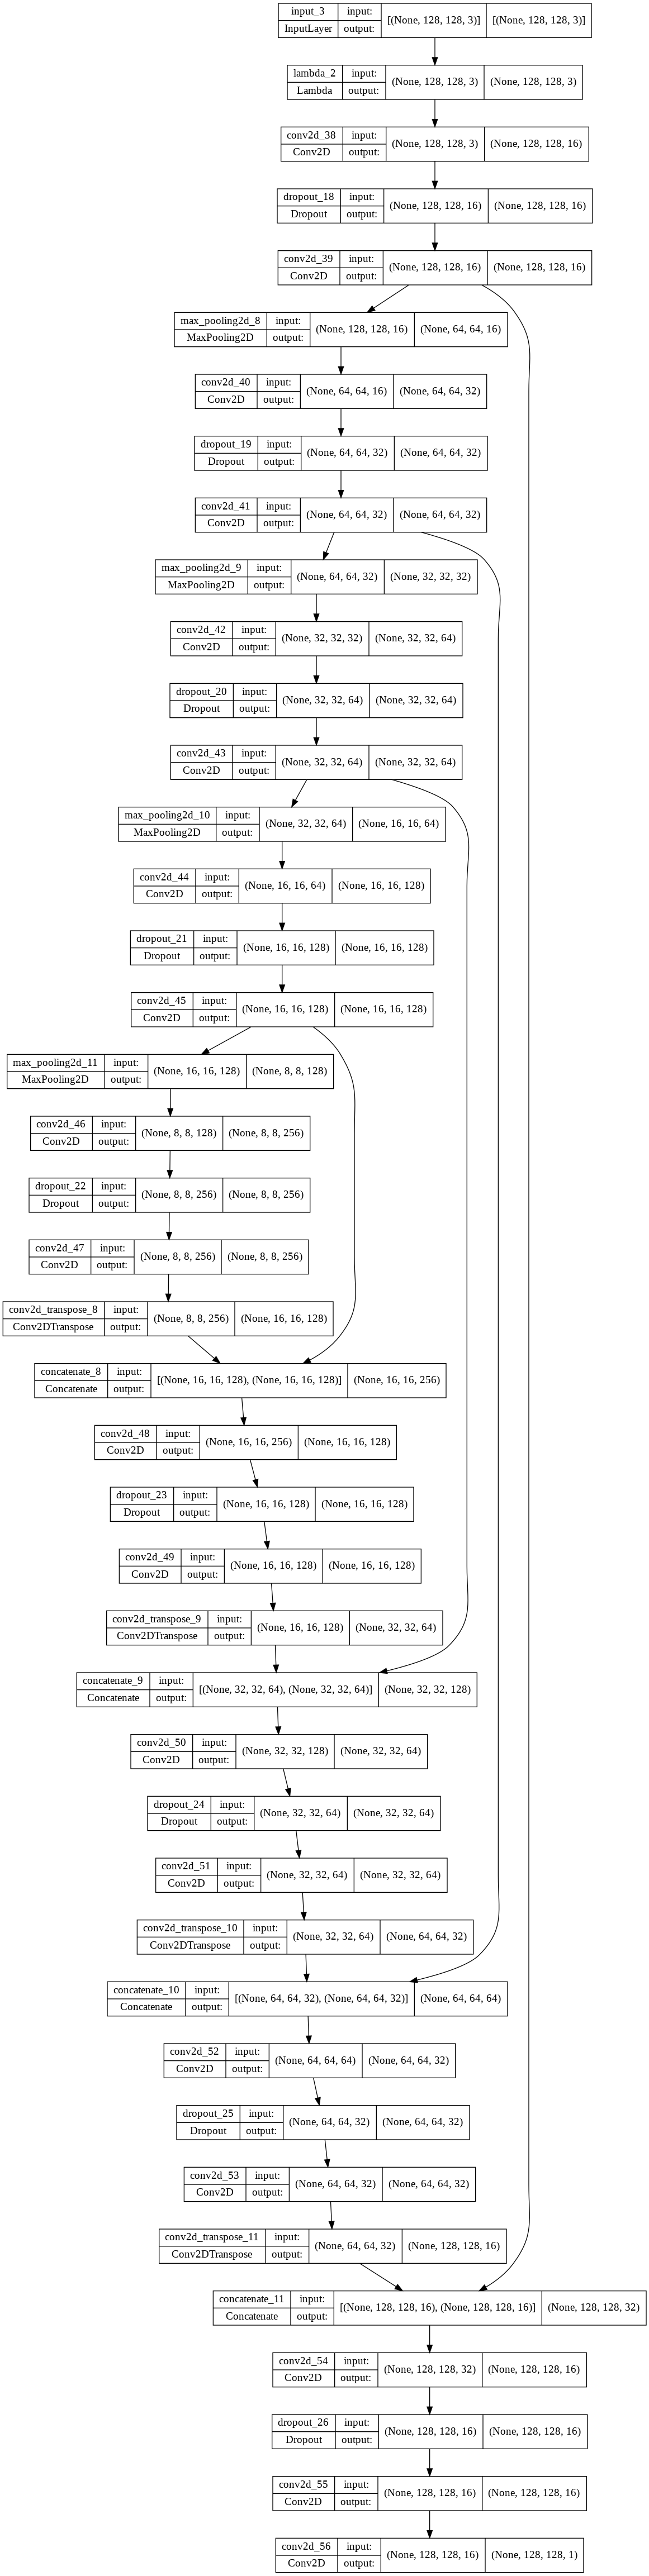

In [15]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='UNet_16_32_64_128.png', show_shapes=True, show_layer_names=True)